<a href="https://colab.research.google.com/github/Haripolishetty/Deep_Learning_lab/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#210968168_Hari Polishetty


WEEK 2 – EXPERIMENTING WITH DEEP NEURAL NETWORKS
Consider the following dataset ‘Churn_Modelling.csv’
https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv

The data set has 14 features which are as follows:-
1. RowNumber:- Represents the number of rows
2. CustomerId:- Represents customerId
3. Surname:- Represents surname of the customer
4. CreditScore:- Represents credit score of the customer
5. Geography:- Represents the city to which customers belongs to
6. Gender:- Represents Gender of the customer
7. Age:- Represents age of the customer
8. Tenure:- Represents tenure of the customer with a bank
9. Balance:- Represents balance hold by the customer
10. NumOfProducts:- Represents the number of bank services used by the customer
11. HasCrCard:- Represents if a customer has a credit card or not
12. IsActiveMember:- Represents if a customer is an active member or not
13. EstimatedSalary:- Represents estimated salary of the customer
14. Exited:- Represents if a customer is going to exit the bank or not.


1). Perform the required pre-processing and write comment lines to explain the pre-processing steps.

2). Perform experiments using (70,15,15) split and tabulate the performance in terms of Accuracy, Precision & Recall for the following experimental setup :
1. Number of Hidden Layers and Number of Units per Layer
Number of Hidden Layers
1
2 3
Number of Units
128, 0 ,0 128, 64, 0 128, 64, 32
      
2. Epochs (10,20,30)
3. Activation function (Sigmoid )
4. Without Regularization, with Regularization (L1/L2)
5. Learning rate ( 0.1, 0.01,0.001)
6. Visualize the training and validation loss against the epochs and comment on optimal
hyperparameters.

In [6]:
#importing Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder

In [12]:
df=pd.read_csv('Churn_Modelling .csv')

In [13]:
#Meta data

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.shape

(10000, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Perform the required pre-processing (attribute removal, encoding, feature scaling) and write comment lines to explain the pre-processing steps.

In [17]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#this attribute won't contribute anything ,so removal of these attributes

#
 label encoding

In [18]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
#we are coverting the categorical into numerical by label encoding

In [19]:
X = data.drop('Exited', axis=1)
y = data['Exited']
#declaring dependent and independent variables!

In [20]:
print("Values after Label Encoding:")
print("Geography:", data['Geography'].unique())
print("Gender:", data['Gender'].unique())

Values after Label Encoding:
Geography: [0 2 1]
Gender: [0 1]


Splitting Data


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splitting data into test and train

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Split the data into training, validation, and testing sets (70-15-15 split) as mentioned in the question
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# feature scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
import tensorflow as tf

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

# For the first network with 1 hidden layer,(128, 0 ,0),Epochs-10,20,30 and Learning rate -0.1,0.01,0.001

In [27]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]



In [28]:
for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")

        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])

        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))

        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.5131 - accuracy: 0.7944 - val_loss: 0.3839 - val_accuracy: 0.8353
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8119 - val_loss: 0.4129 - val_accuracy: 0.8293
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8246 - val_loss: 0.4007 - val_accuracy: 0.8520
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8316 - val_loss: 0.3645 - val_accuracy: 0.8587
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8300 - val_loss: 0.3778 - val_accuracy: 0.8580
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8383 - val_loss: 0.3665 - val_accuracy: 0.8520
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8377 - v

In [29]:
results = {}

In [30]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8593
Test Loss: 0.34206366539001465, Test Accuracy: 0.859333336353302



# Second Nueral network with 2 hidden layers (128,64,0), epochs =(10,20,30) and learning rate=(0.1,0.01,0.001)

In [31]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]


In [32]:

for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")

        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])

        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))

        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5327 - accuracy: 0.7853 - val_loss: 0.4846 - val_accuracy: 0.7967
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7910 - val_loss: 0.4624 - val_accuracy: 0.8107
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.7916 - val_loss: 0.4783 - val_accuracy: 0.8107
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.7921 - val_loss: 0.4609 - val_accuracy: 0.8107
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7923 - val_loss: 0.4850 - val_accuracy: 0.8107
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.7921 - val_loss: 0.4843 - val_accuracy: 0.8107
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5572 - accuracy: 0.7913 - v

In [33]:
results = {}

In [34]:
if epochs not in results:
        results[epochs] = {}
        results[epochs][lr] = (test_loss, test_accuracy)

In [35]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8620
Test Loss: 0.3442528545856476, Test Accuracy: 0.8619999885559082



# For nueral netwrok with 3 hidden layers (128,64,32), epochs=(10,20,30) and  learning rate=(0.1,0.01,0.001)

In [36]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")

        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dense(32,activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])

        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))

        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5730 - accuracy: 0.7854 - val_loss: 0.4950 - val_accuracy: 0.8107
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5124 - accuracy: 0.7924 - val_loss: 0.4854 - val_accuracy: 0.8107
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.7924 - val_loss: 0.4932 - val_accuracy: 0.8107
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5128 - accuracy: 0.7924 - val_loss: 0.4855 - val_accuracy: 0.8107
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.7924 - val_loss: 0.4898 - val_accuracy: 0.8107
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.7924 - val_loss: 0.4865 - val_accuracy: 0.8107
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.7924 - v

In [37]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8513
Test Loss: 0.3891446590423584, Test Accuracy: 0.8513333201408386



# Visualisation

In [38]:
learning_rates = [0.1, 0.01, 0.001]

In [39]:
epochs_list = [10, 20, 30]

In [40]:
import matplotlib.pyplot as plt

In [41]:
from tensorflow.keras.optimizers import legacy

Training with learning rate: 0.1, epochs: 10
Epoch 1/10
219/219 [==============================] - 2s 6ms/step - loss: 0.5014 - accuracy: 0.7996 - val_loss: 0.3874 - val_accuracy: 0.8473
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4465 - accuracy: 0.8196 - val_loss: 0.3942 - val_accuracy: 0.8527
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8291 - val_loss: 0.4738 - val_accuracy: 0.8207
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4381 - accuracy: 0.8279 - val_loss: 0.4391 - val_accuracy: 0.8513
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8343 - val_loss: 0.3829 - val_accuracy: 0.8573
Epoch 6/10
219/219 [==============================] - 2s 8ms/step - loss: 0.4256 - accuracy: 0.8351 - val_loss: 0.3929 - val_accuracy: 0.8553
Epoch 7/10
219/219 [==============================] - 2s 7ms/step - loss: 0.4361 - accuracy: 0.8341 - v

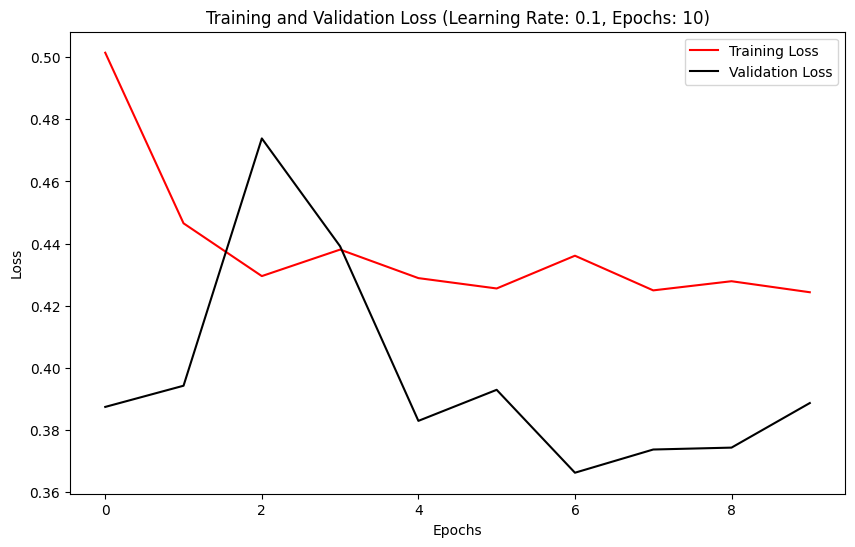

Training with learning rate: 0.1, epochs: 20
Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.7930 - val_loss: 0.4058 - val_accuracy: 0.8340
Epoch 2/20
219/219 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.8201 - val_loss: 0.3760 - val_accuracy: 0.8480
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8354 - val_loss: 0.3841 - val_accuracy: 0.8447
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8326 - val_loss: 0.3742 - val_accuracy: 0.8473
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8324 - val_loss: 0.3635 - val_accuracy: 0.8647
Epoch 6/20
219/219 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8339 - val_loss: 0.3848 - val_accuracy: 0.8473
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.4265 - accuracy: 0.8340 - v

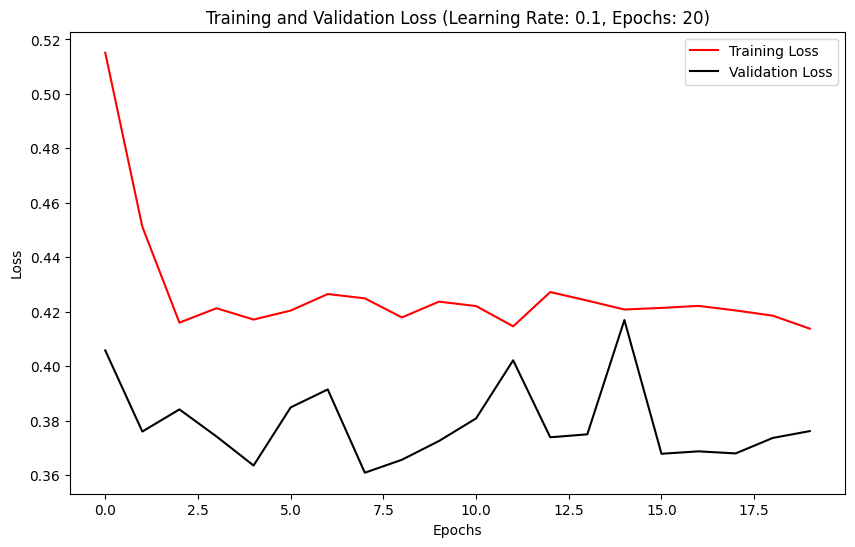

Training with learning rate: 0.1, epochs: 30
Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5038 - accuracy: 0.7951 - val_loss: 0.4110 - val_accuracy: 0.8453
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.8226 - val_loss: 0.3838 - val_accuracy: 0.8613
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.8253 - val_loss: 0.3776 - val_accuracy: 0.8520
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8240 - val_loss: 0.3793 - val_accuracy: 0.8393
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8364 - val_loss: 0.3985 - val_accuracy: 0.8433
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8306 - val_loss: 0.3826 - val_accuracy: 0.8587
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.8351 - v

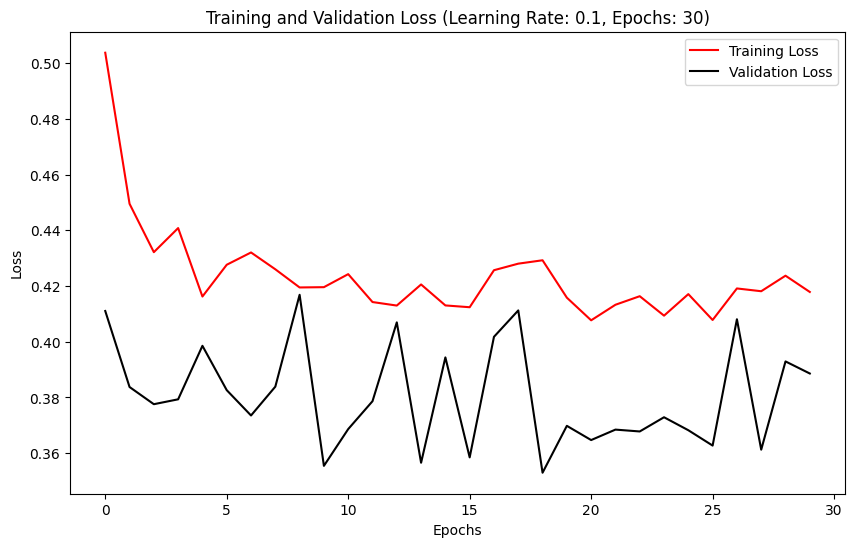

Training with learning rate: 0.01, epochs: 10
Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.4142 - accuracy: 0.8263 - val_loss: 0.3497 - val_accuracy: 0.8620
Epoch 2/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3763 - accuracy: 0.8433 - val_loss: 0.3527 - val_accuracy: 0.8593
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8460 - val_loss: 0.3495 - val_accuracy: 0.8613
Epoch 4/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8491 - val_loss: 0.3428 - val_accuracy: 0.8707
Epoch 5/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8504 - val_loss: 0.3435 - val_accuracy: 0.8673
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8489 - val_loss: 0.3389 - val_accuracy: 0.8660
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8499 - 

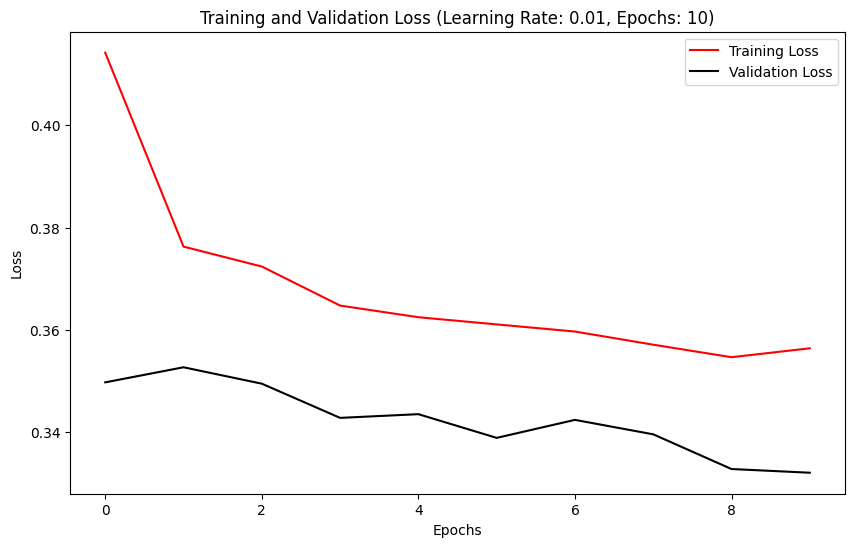

Training with learning rate: 0.01, epochs: 20
Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8257 - val_loss: 0.3538 - val_accuracy: 0.8667
Epoch 2/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.8440 - val_loss: 0.3462 - val_accuracy: 0.8600
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8486 - val_loss: 0.3521 - val_accuracy: 0.8567
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3676 - accuracy: 0.8491 - val_loss: 0.3425 - val_accuracy: 0.8673
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8479 - val_loss: 0.3436 - val_accuracy: 0.8660
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8513 - val_loss: 0.3363 - val_accuracy: 0.8733
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8520 - 

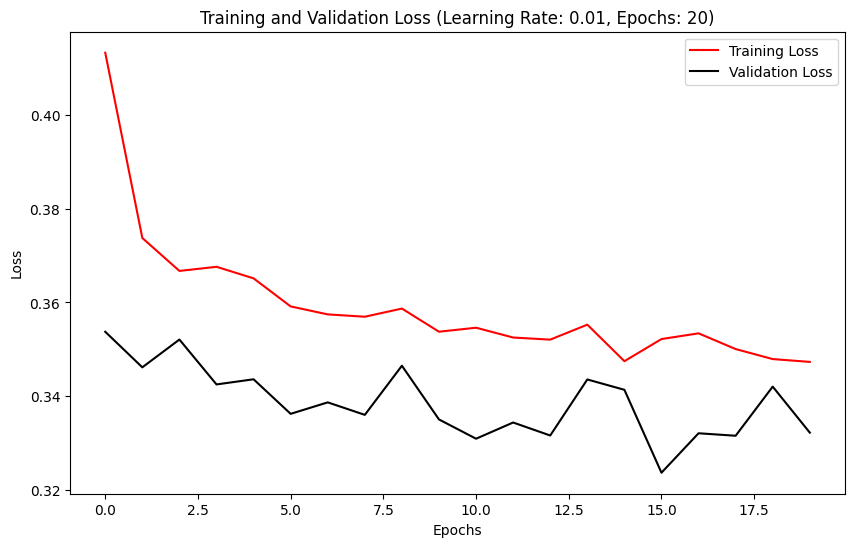

Training with learning rate: 0.01, epochs: 30
Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8281 - val_loss: 0.3566 - val_accuracy: 0.8533
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8441 - val_loss: 0.3557 - val_accuracy: 0.8580
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8426 - val_loss: 0.3541 - val_accuracy: 0.8587
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8466 - val_loss: 0.3347 - val_accuracy: 0.8673
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8496 - val_loss: 0.3468 - val_accuracy: 0.8633
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8479 - val_loss: 0.3310 - val_accuracy: 0.8640
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8537 - 

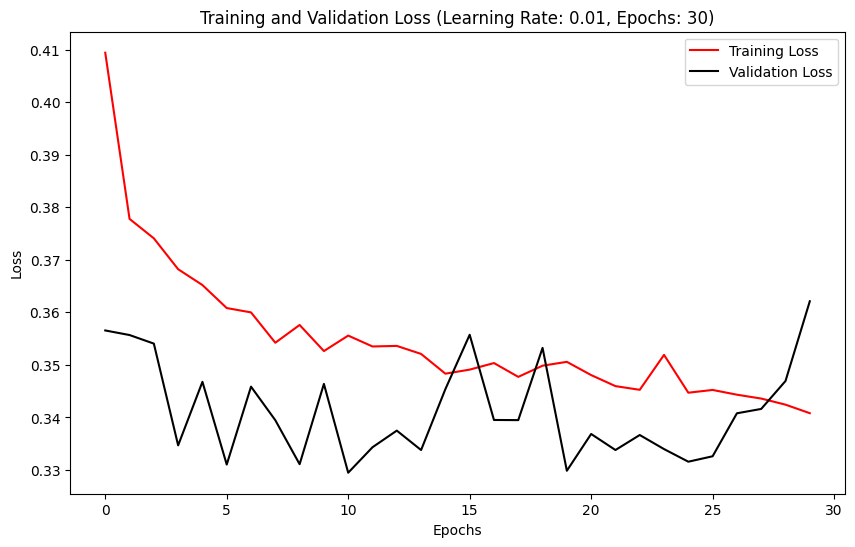

Training with learning rate: 0.001, epochs: 10
Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4710 - accuracy: 0.7944 - val_loss: 0.4139 - val_accuracy: 0.8260
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8236 - val_loss: 0.3894 - val_accuracy: 0.8413
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3962 - accuracy: 0.8333 - val_loss: 0.3685 - val_accuracy: 0.8580
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8444 - val_loss: 0.3560 - val_accuracy: 0.8667
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8454 - val_loss: 0.3518 - val_accuracy: 0.8567
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8493 - val_loss: 0.3486 - val_accuracy: 0.8667
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8477 -

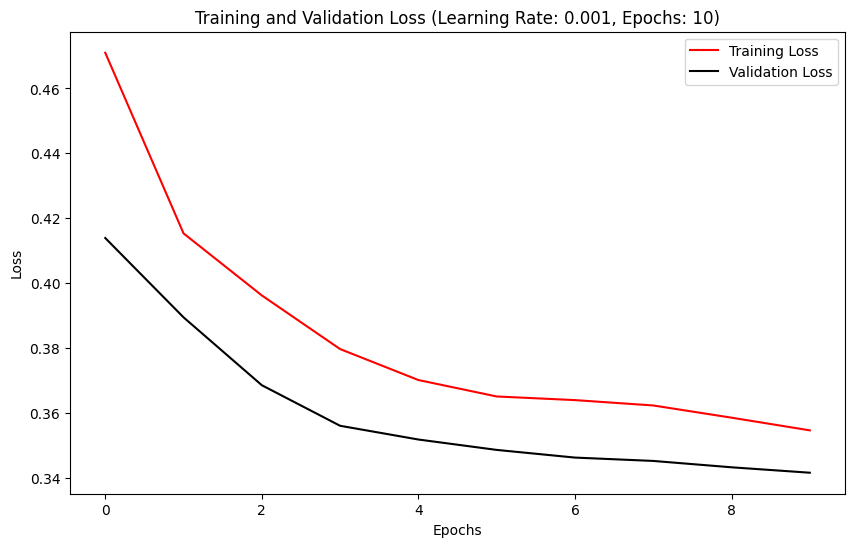

Training with learning rate: 0.001, epochs: 20
Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7949 - val_loss: 0.4092 - val_accuracy: 0.8273
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8244 - val_loss: 0.3865 - val_accuracy: 0.8447
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8350 - val_loss: 0.3687 - val_accuracy: 0.8573
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8407 - val_loss: 0.3558 - val_accuracy: 0.8667
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8449 - val_loss: 0.3525 - val_accuracy: 0.8647
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8504 - val_loss: 0.3468 - val_accuracy: 0.8653
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8469 -

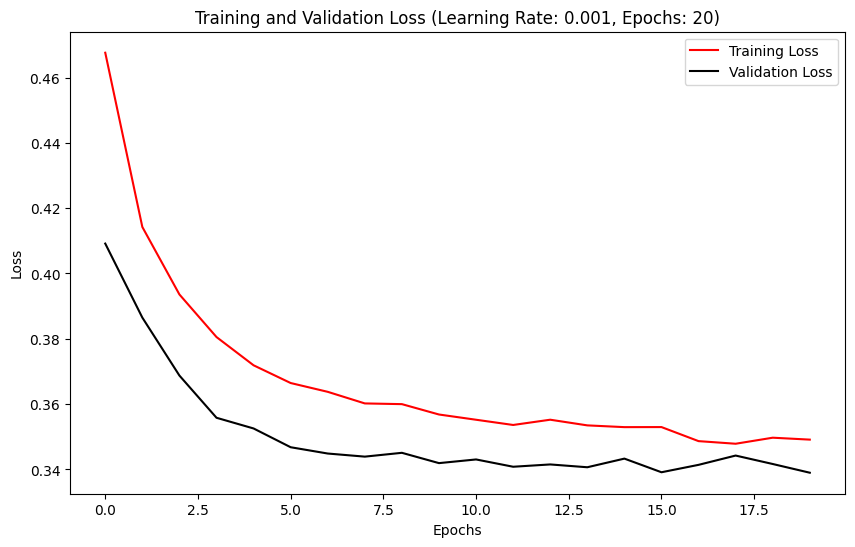

Training with learning rate: 0.001, epochs: 30
Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4716 - accuracy: 0.7939 - val_loss: 0.4066 - val_accuracy: 0.8353
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8230 - val_loss: 0.3820 - val_accuracy: 0.8527
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8386 - val_loss: 0.3663 - val_accuracy: 0.8580
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8434 - val_loss: 0.3567 - val_accuracy: 0.8653
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8477 - val_loss: 0.3486 - val_accuracy: 0.8687
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8494 - val_loss: 0.3458 - val_accuracy: 0.8673
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8494 -

In [ ]:
for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Training with learning rate: {lr}, epochs: {epochs}")
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])

        # Use the legacy Adam optimizer
        optimizer = legacy.Adam(learning_rate=lr)

        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model for specified epochs and store the history
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss',color='r')
        plt.plot(history.history['val_loss'], label='Validation Loss',color='black')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss (Learning Rate: {lr}, Epochs: {epochs})')
        plt.legend()
        plt.show()

#OBSERVATION

In [43]:
### case 1: Learning Rate = 0.1, Epochs = 10-30
## we can observe that as no of epoch increasing it reflects the models performance , and for each epoch we can see the improvement in the accuracy.
## Learning rate of 0.1 seems to be too high, as the training is not very stable. Loss and accuracy values are fluctuating.
#### The model achieves decent accuracy .



In [44]:
### case 2: Learning Rate = 0.01, Epochs = 10-30
#### Lower learning rate 0.01 shows more stability compared to the previous one .
#### The model improve over epochs and achieves a good balance between training and validation accuracy.


In [45]:
### case 3: Learning Rate = 0.001, Epochs = 10
####  due to the lower learning rate, The model starts with a higher loss and lower accuracy.
